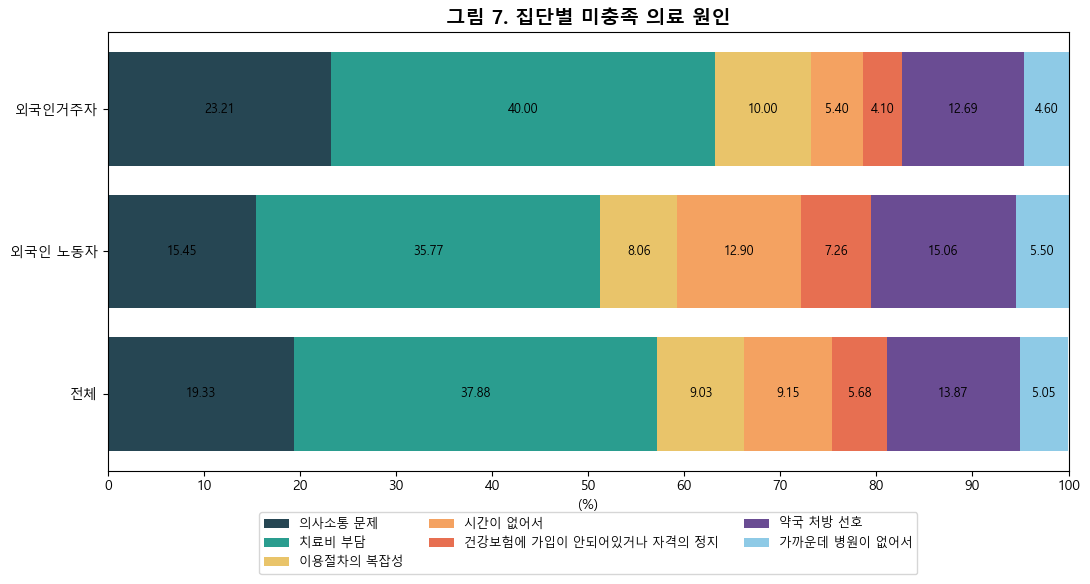

In [20]:
import matplotlib.pyplot as plt

# 한글 폰트 설정 (운영체제에 따라 하나 선택)
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows
# plt.rcParams['font.family'] = 'AppleGothic'  # Mac
plt.rcParams['axes.unicode_minus'] = False

# 카테고리 및 실제 데이터 입력
categories = ['외국인거주자', '외국인 노동자', '전체']
labels = ['의사소통 문제', '치료비 부담', '이용절차의 복잡성', '시간이 없어서',
          '건강보험에 가입이 안되어있거나 자격의 정지', '약국 처방 선호', "가까운데 병원이 없어서"]

# 실제 수치 입력
data = [
    [23.21, 40.00, 10.00, 5.40, 4.1, 12.69, 4.60],   # 외국인거주자 (H2/F4)
    [15.45, 35.77, 8.06, 12.90, 7.26, 15.06,5.5],   # 외국인 노동자 (E9)
    [19.33, 37.88, 9.03, 9.15, 5.68, 13.87,5.05]   # 전체
]

# 색상 설정 (명확하게 구분 가능한 컬러)
colors = ["#264653", "#2a9d8f", "#e9c46a", "#f4a261", "#e76f51", "#6a4c93", "#8ecae6"]


# 그래프 생성
fig, ax = plt.subplots(figsize=(11, 6))
left = [0] * len(categories)

# 각 구간에 대한 바 그리기
for i in range(len(labels)):
    bar = ax.barh(categories, [row[i] for row in data], left=left, color=colors[i], label=labels[i])
    for j, rect in enumerate(bar):
        width = rect.get_width()
        if width > 3:
            ax.text(rect.get_x() + width / 2, rect.get_y() + rect.get_height() / 2,
                    f'{width:.2f}', ha='center', va='center', color='black', fontsize=9)
    left = [left[k] + data[k][i] for k in range(len(categories))]

# 설정
ax.set_title('그림 7. 집단별 미충족 의료 원인', fontsize=14, weight='bold')
ax.set_xlim(0, 100)
ax.set_xlabel('(%)')
ax.set_xticks(range(0, 101, 10))
ax.invert_yaxis()
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=3, fontsize=9)

plt.tight_layout()
plt.show()


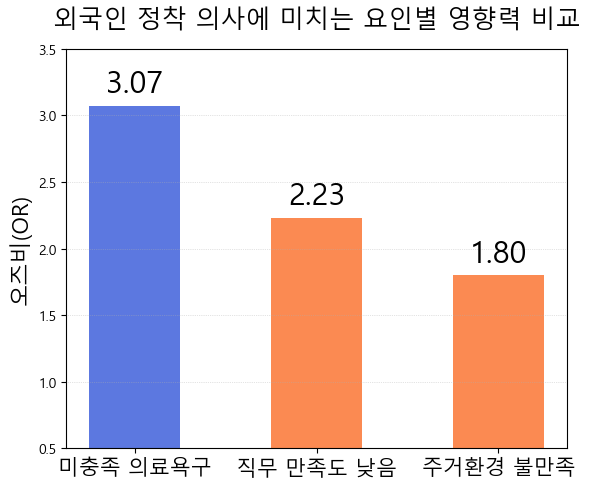

In [21]:
import numpy as  np
labels = ['미충족 의료욕구', '직무 만족도 낮음', '주거환경 불만족']
values = [3.07, 2.23, 1.80]
colors = ["#5c78e0", '#fb8a52', "#fb8a52"]  # 막대 색상은 기존 유지

x_pos = np.arange(len(labels))
fig, ax = plt.subplots(figsize=(6, 5))
bars = ax.bar(x_pos, values, color=colors, width=0.5)

# --- 막대 위 수치 표시: 글자 크기 2배(11 -> 22) ---
for bar in bars:
    h = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, h + 0.05, f'{h:.2f}',
            ha='center', va='bottom', fontsize=22)

# --- x축 라벨 색상 개별 지정 ---
ax.set_xticks(x_pos)
ax.set_xticklabels(labels, fontsize=15)

navy = '#000000'   # 남색계열
gray = "#000000"   # 회색계열
for ticklabel in ax.get_xticklabels():
    if ticklabel.get_text() == '미충족 의료욕구':
        ticklabel.set_color(navy)
    else:
        ticklabel.set_color(gray)

# 축/제목 및 기타
ax.set_ylim(0.5, 3.5)
ax.set_yticks(np.arange(0.5, 3.6, 0.5))
ax.set_ylabel('오즈비(OR)', fontsize=16)
ax.set_title('외국인 정착 의사에 미치는 요인별 영향력 비교', fontsize=18, pad=15)
ax.grid(axis='y', linestyle=':', linewidth=0.5, alpha=0.7)

fig.tight_layout()
plt.show()

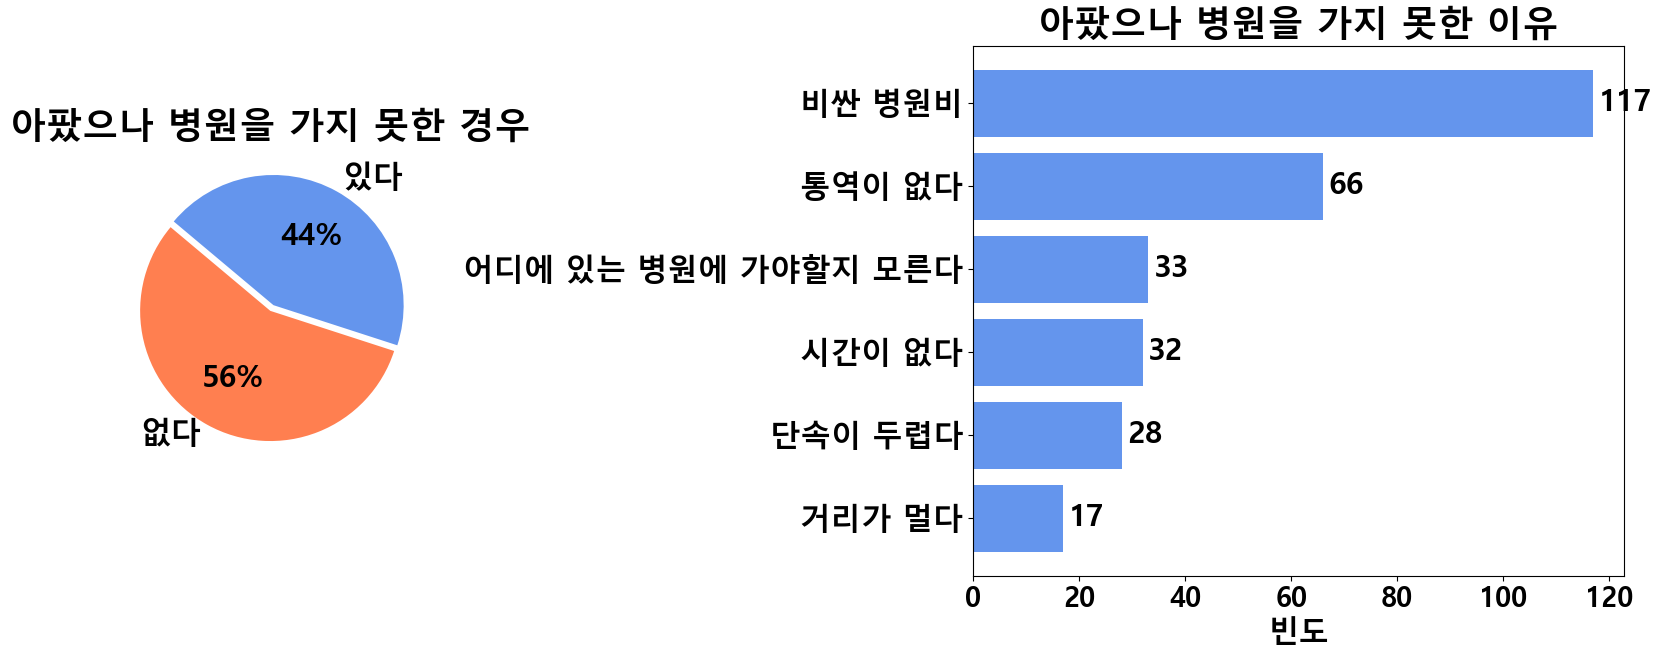

In [22]:
from matplotlib import font_manager

# ===== 한글 폰트 설정 =====
# Mac
# plt.rcParams['font.family'] = 'AppleGothic'
# Windows
plt.rcParams['font.family'] = 'Malgun Gothic'
# Ubuntu (Nanum 설치 시)
# plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False

# ===== 전역 Bold & 기본 폰트 크기 상향 =====
plt.rcParams['font.weight'] = 'bold'      # 전역 글꼴 Bold
plt.rcParams['axes.titleweight'] = 'bold' # 제목 Bold
plt.rcParams['axes.labelweight'] = 'bold' # 축 라벨 Bold
plt.rcParams['font.size'] = 20            # 전체 기본 글꼴 크기 ↑ (더 키움)

# ===== 데이터 =====
labels_pie = ["없다", "있다"]
sizes_pie = [55, 43]
colors_pie = ["#FF7F50", "#6495ED"]  # 코랄, 파랑
explode = (0, 0.05)

reasons = [
    "비싼 병원비",
    "통역이 없다",
    "어디에 있는 병원에 가야할지 모른다",
    "시간이 없다",
    "단속이 두렵다",
    "거리가 멀다",
]
counts = [117, 66, 33, 32, 28, 17]
colors_bar = ["#6495ED"] * len(reasons)

# ===== 그림 크기(표 크기) 확대 =====
fig, axes = plt.subplots(1, 2, figsize=(16, 7), gridspec_kw={"width_ratios": [1, 2]})

# ===== 파이 차트 =====
axes[0].pie(
    sizes_pie,
    explode=explode,
    labels=labels_pie,
    colors=colors_pie,
    autopct=lambda p: f"{p:.0f}%",
    startangle=140,
    textprops={"fontsize": 22, "fontweight": "bold"},  # 라벨/퍼센트 크게 & Bold
)
axes[0].set_title("아팠으나 병원을 가지 못한 경우", fontsize=26, fontweight="bold")

# ===== 수평 막대 차트 =====
y_pos = np.arange(len(reasons))
axes[1].barh(y_pos, counts, color=colors_bar)
axes[1].set_yticks(y_pos)
axes[1].set_yticklabels(reasons, fontsize=22, fontweight="bold")  # 이유 라벨 크게 & Bold
axes[1].invert_yaxis()
axes[1].set_xlabel("빈도", fontsize=22, fontweight="bold")
axes[1].set_title("아팠으나 병원을 가지 못한 이유", fontsize=26, fontweight="bold")

# x축 눈금 글씨도 Bold로
for tick in axes[1].get_xticklabels():
    tick.set_fontsize(20)
    tick.set_fontweight("bold")

# 막대 끝 값(숫자) 크게 & Bold
for i, v in enumerate(counts):
    axes[1].text(v + 1, i, str(v), va="center", fontsize=22, fontweight="bold")

plt.tight_layout()
# plt.savefig("hospital_reasons_bold.png", dpi=220)  # 필요하면 저장
plt.show()

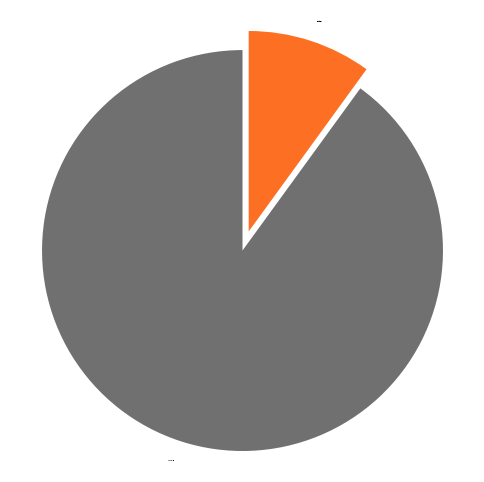

In [23]:
import matplotlib.pyplot as plt

# 데이터
sizes = [90, 10]
colors = ["#707070",'#fd6f22']
labels = ['기타 지역', '비수도권']
explode = [0, 0.1]  # 두 번째 조각만 분리

# 파이차트 그리기
plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    
    colors=colors,
    explode=explode,
    startangle=90,
    wedgeprops={'linewidth': 0},
    textprops={'fontsize':0, 'color': 'black'}
)

plt.axis('equal')  # 원형 유지
plt.show()

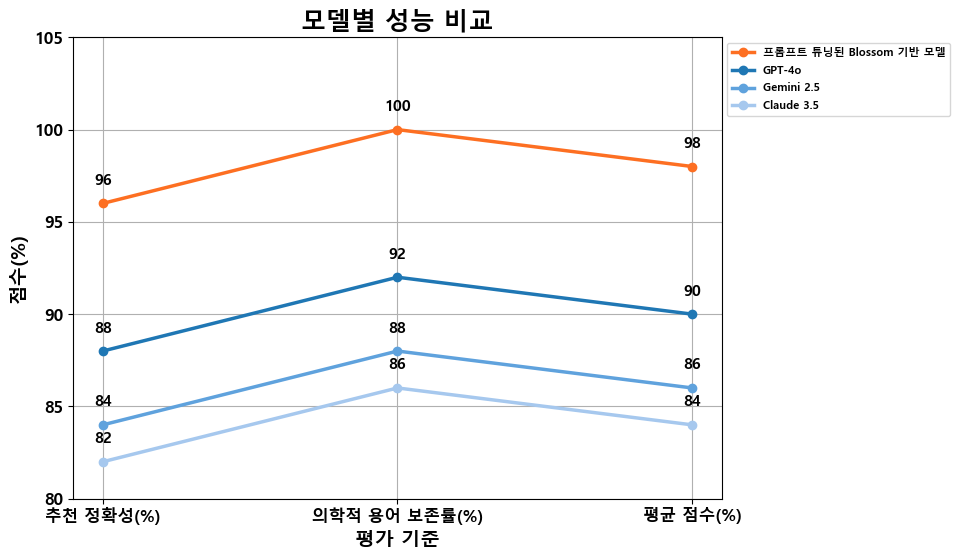

In [36]:
import matplotlib.pyplot as plt

# 데이터
x_labels = ['추천 정확성(%)', '의학적 용어 보존률(%)', '평균 점수(%)']
models = {
    '프롬프트 튜닝된 Blossom 기반 모델': [96, 100, 98],
    'GPT-4o': [88, 92, 90],
    'Gemini 2.5': [84, 88, 86],
    'Claude 3.5': [82, 86, 84],
}

colors = {
    '프롬프트 튜닝된 Blossom 기반 모델': '#fd6f22',  # 주황
    'GPT-4o': '#1f77b4',   # 진한 파랑
    'Gemini 2.5': '#5fa2dd',  # 중간 파랑
    'Claude 3.5': '#a6c8ee'  # 연한 파랑
}

# 그래프 설정
plt.figure(figsize=(10, 6))

for model, scores in models.items():
    plt.plot(x_labels, scores, marker='o', label=model, linewidth=2.5, color=colors[model])

# 스타일
plt.title('모델별 성능 비교', fontsize=18, weight='bold')
plt.xlabel('평가 기준', fontsize=14)
plt.ylabel('점수(%)', fontsize=14)
plt.ylim(80, 105)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)

plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=8)
# 숫자 표시
for model, scores in models.items():
    for i, score in enumerate(scores):
        plt.text(i, score + 1, str(score), ha='center', fontsize=11)

plt.tight_layout()
plt.show()

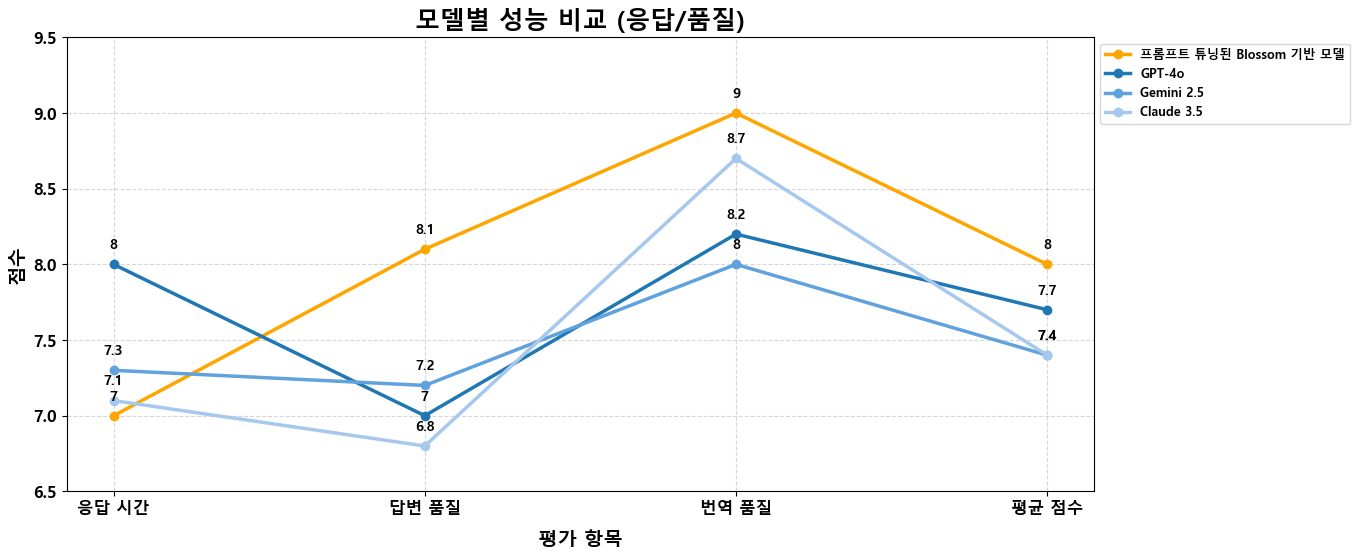

In [44]:
import matplotlib.pyplot as plt

# 데이터
x_labels = ['응답 시간', '답변 품질', '번역 품질', '평균 점수']
models = {
    '프롬프트 튜닝된 Blossom 기반 모델': [7, 8.1, 9, 8],
    'GPT-4o': [8, 7, 8.2, 7.7],
    'Gemini 2.5': [7.3, 7.2, 8, 7.4],
    'Claude 3.5': [7.1, 6.8, 8.7, 7.4],
}

colors = {
    '프롬프트 튜닝된 Blossom 기반 모델': '#FFA500',
    'GPT-4o': '#1f77b4',
    'Gemini 2.5': '#5fa2dd',
    'Claude 3.5': '#a6c8ee'
}

# 👉 figsize를 넓게 설정 (가로 12~14 추천)
plt.figure(figsize=(14, 6))

for model, scores in models.items():
    plt.plot(x_labels, scores, marker='o', label=model, linewidth=2.5, color=colors[model])

# 스타일
plt.title('모델별 성능 비교 (응답/품질)', fontsize=18, weight='bold')
plt.xlabel('평가 항목', fontsize=14, labelpad=10)
plt.ylabel('점수', fontsize=14)
plt.ylim(6.5, 9.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)

# 범례 (작고 바깥에)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=9)

# 수치 표시
for model, scores in models.items():
    for i, score in enumerate(scores):
        plt.text(i, score + 0.1, str(score), ha='center', fontsize=10)

plt.tight_layout()
plt.show()